# Build a Very Own MSA Dudes👨🏾 and Food🍔 Chatbot

A chat bot that can answer questions with context from the whatsapp chat.

### Methodology
LangChain + OpenAI + Retrieval Augmented Generation

### What we will Learn Today
1. LangChain basics
2. Chains
3. TextSplitters
4. Text Vector Embeddings
5. Retreival Augmented Generation

In [60]:
# Run the following commands to set up your environment
%pip install --quiet --upgrade langchain langchain-community langchain-chroma

Note: you may need to restart the kernel to use updated packages.


In [62]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from langchain import hub
from langchain_chroma import Chroma
from langchain_openai import ChatOpenAI
from langchain_community.document_loaders import WhatsAppChatLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOpenAI(model="gpt-4")
# Load, chunk and index the contents of the blog.
whatsapp_loader = WhatsAppChatLoader(path="./chat_formatted.txt")
docs = whatsapp_loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

# Retrieve and generate using the relevant snippets of the blog.
retriever = vectorstore.as_retriever()
prompt = ChatPromptTemplate.from_template(
    """
    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
    Question: {question} 
    Context: {context} 
    Answer:
    """
)


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

rag_chain.invoke("What are some of the funniest things said in the chat?")

'Some of the funniest things said in the chat include Abdullah Bazz\'s comment, "facts bro it’s easy to drop 30 messages a day when you’re biggest threat doesn’t know how to undo 😭" and Mirza Zuhayr\'s statement, "Arhum still being #1 after leaving this chat for months is wild". Another humorous remark is Abdullah Bazz\'s memory of Nav trolling him on his first day in the chat.'

# What is Langchain?
A **Framework** to run and use LLMs to perform tasks. Using Langchain to orchestrate these tasks is much easier and standardized than using libraries yourself.

- LLM Chains
- LLM Agents
- Vector Databases


In [81]:
from langchain_openai import ChatOpenAI


In [83]:
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hey!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_831e067d82', 'finish_reason': 'stop', 'logprobs': None}, id='run-13c31514-fd22-430d-97df-4acd1430a069-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18})

In [92]:
from langchain_groq import ChatGroq
# SOME FREE ALTERNATIVES ARE BELOW

# Mixtral
chat_mixtral = ChatGroq(model_name="mixtral-8x7b-32768")
print("Mixtral Output:", chat_mixtral.invoke("Hello").content, "\n")

# Llama
chat_llama = ChatGroq(model_name="llama3-70b-8192")
print("Llama output:", chat_llama.invoke("Hello").content)

Mixtral Output: Hello! It's nice to meet you. Is there something you would like to ask or talk about? I'm here to help with any questions you might have about writing, language, or any other topic you'd like to discuss. Just let me know how I can assist you. I'm here to help and make your day a little bit easier. 

Llama output: Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?


# TextLoaders and Text Splitters

### TextLoaders
- langchain has several ways to load in the data that you want
- web loaders
- youtube transcript loaders
- pdf, word, doc loaders

We will be using their Whatsapp loader!

# Tokens + Embeddings
- tokens are like parts of words "apologize", "apologizing", "apologized"
- thus token can be "apolog", and others can be "ize", "izing", "ed" etc

Thus, on average for chat gpt's tokenizer is 1.5 tokens per word

Given a word count of 552,599, the estimated token count is approximately:
552,599 × 1.5 = 828,898 tokens.

### What do you do when the amount of "context" doesn't fit in the context length of the model you are using? in our case it's 128k!

- our text is about 7.5x bigger than chat gpts context!

In [93]:
from langchain_community.document_loaders import WhatsAppChatLoader
# Load, chunk and index the contents of the blog.
whatsapp_loader = WhatsAppChatLoader(path="./chat_formatted.txt")
docs = whatsapp_loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
# splits = text_splitter.split_documents(docs)
# # vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

# # Retrieve and generate using the relevant snippets of the blog.
# retriever = vectorstore.as_retriever()
# prompt = hub.pull("rlm/rag-prompt")


# def format_docs(docs):
#     return "\n\n".join(doc.page_content for doc in docs)


# rag_chain = (
#     {"context": retriever | format_docs, "question": RunnablePassthrough()}
#     | prompt
#     | llm
#     | StrOutputParser()
# )

# rag_chain.invoke("What is Task Decomposition?")

In [96]:
docs[0].page_content

'~\u202fIshaq on 8/24/23, 1:05:53\u202fPM: did anyone take cs 1331 online w/ Omojokun, or is in it now? How is it?\n\n~\u202fLemon Pepper Hoom on 8/24/23, 1:14:25\u202fPM: @16784880988 took it fall 2021\n\n~\u202fZain Ghazanfar on 8/24/23, 1:27:20\u202fPM: Took it last semester with him. Exams are pretty easy as long as you watch the videos and actually do the hws (don’t copy off github 😭)\n\n~\u202fMirza Zuhayr on 8/24/23, 1:28:15\u202fPM: Free shirts in Smithgall building next to student center, only large tho\n\n~\u202fAbdullah Bazz on 8/24/23, 1:35:46\u202fPM: does anyone know what bus goes from east campus to west ?\n\n~\u202fAbdullah Bazz on 8/24/23, 1:35:51\u202fPM: i have class at howey\n\n~\u202fZain Ghazanfar on 8/24/23, 1:36:43\u202fPM: Downlod transloc\n\n~\u202fZain Ghazanfar on 8/24/23, 1:36:48\u202fPM: Itll tell u all of the routes\n\n~\u202fNabhan on 8/24/23, 1:37:12\u202fPM: download the bus app!\n\n~\u202fAbdullah Bazz on 8/24/23, 1:37:52\u202fPM: bet thank y’all\n\n~

In [108]:
print("# of characters in the entire chat:", len(docs[0].page_content))
print("# of words in the entire chat:", len(docs[0].page_content.split()))

# of characters in the entire chat: 3104033
# of words in the entire chat: 552599


In [107]:
import tiktoken

model = "gpt-4o"  # Replace with the model you are using
encoding = tiktoken.encoding_for_model(model)

# Tokenize the string
tokens = encoding.encode(docs[0].page_content)
# Print tokens and their count
print(f"Tokens: {tokens[:10]}")
print(f"Number of tokens: {len(tokens)}")

Tokens: [93, 35971, 40, 1116, 12026, 402, 220, 23, 14, 1494]
Number of tokens: 1331016


# What are Tokens?
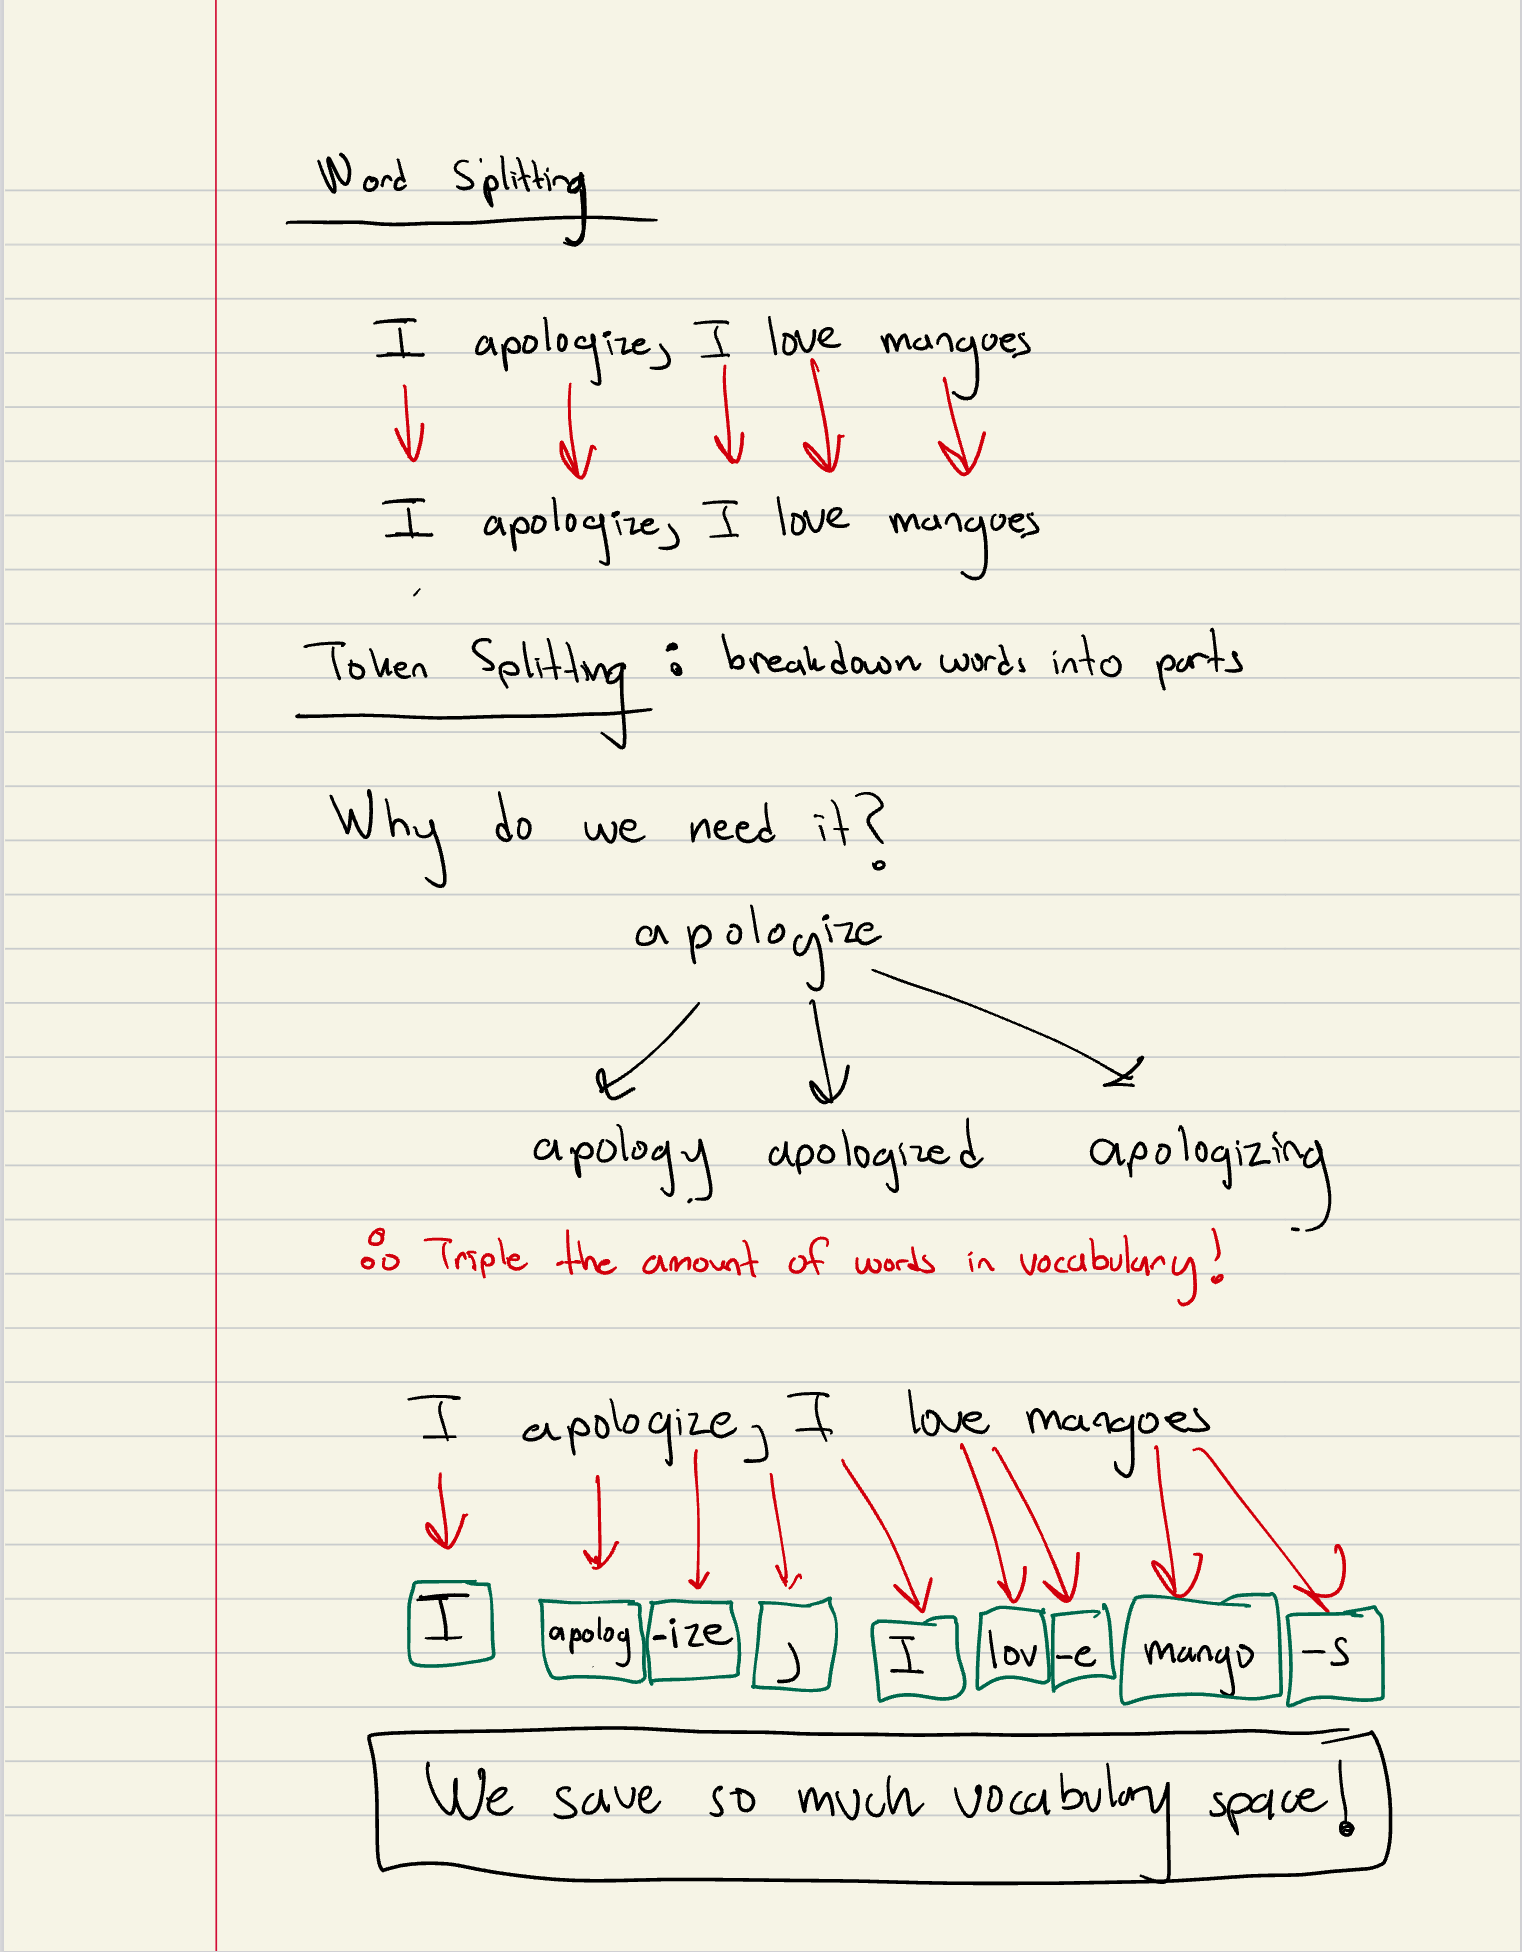



In [111]:
# Print tokens and their count
print(f"Tokens: {tokens[:10]}")
print(f"Number of tokens: {len(tokens)}")

Tokens: [93, 35971, 40, 1116, 12026, 402, 220, 23, 14, 1494]
Number of tokens: 1331016


### GPT-4o Token Limit
1.3M tokens is around 12x greater than the context length of GPT-4o!

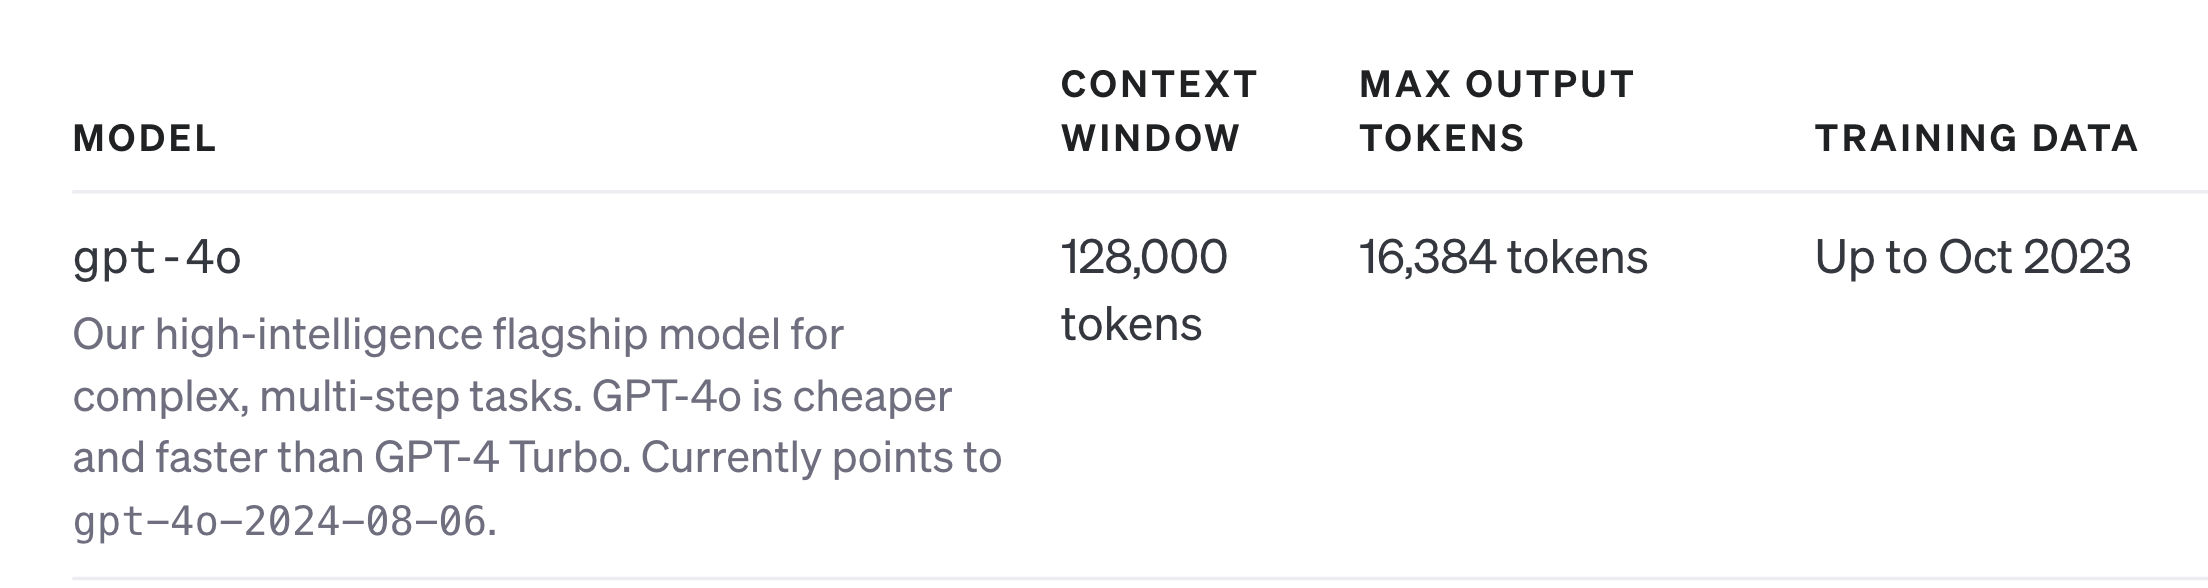


In [112]:
# Another interesting insight -> Why numbers instead of sub-words?
print(f"Tokens: {tokens[:10]}")

Tokens: [93, 35971, 40, 1116, 12026, 402, 220, 23, 14, 1494]


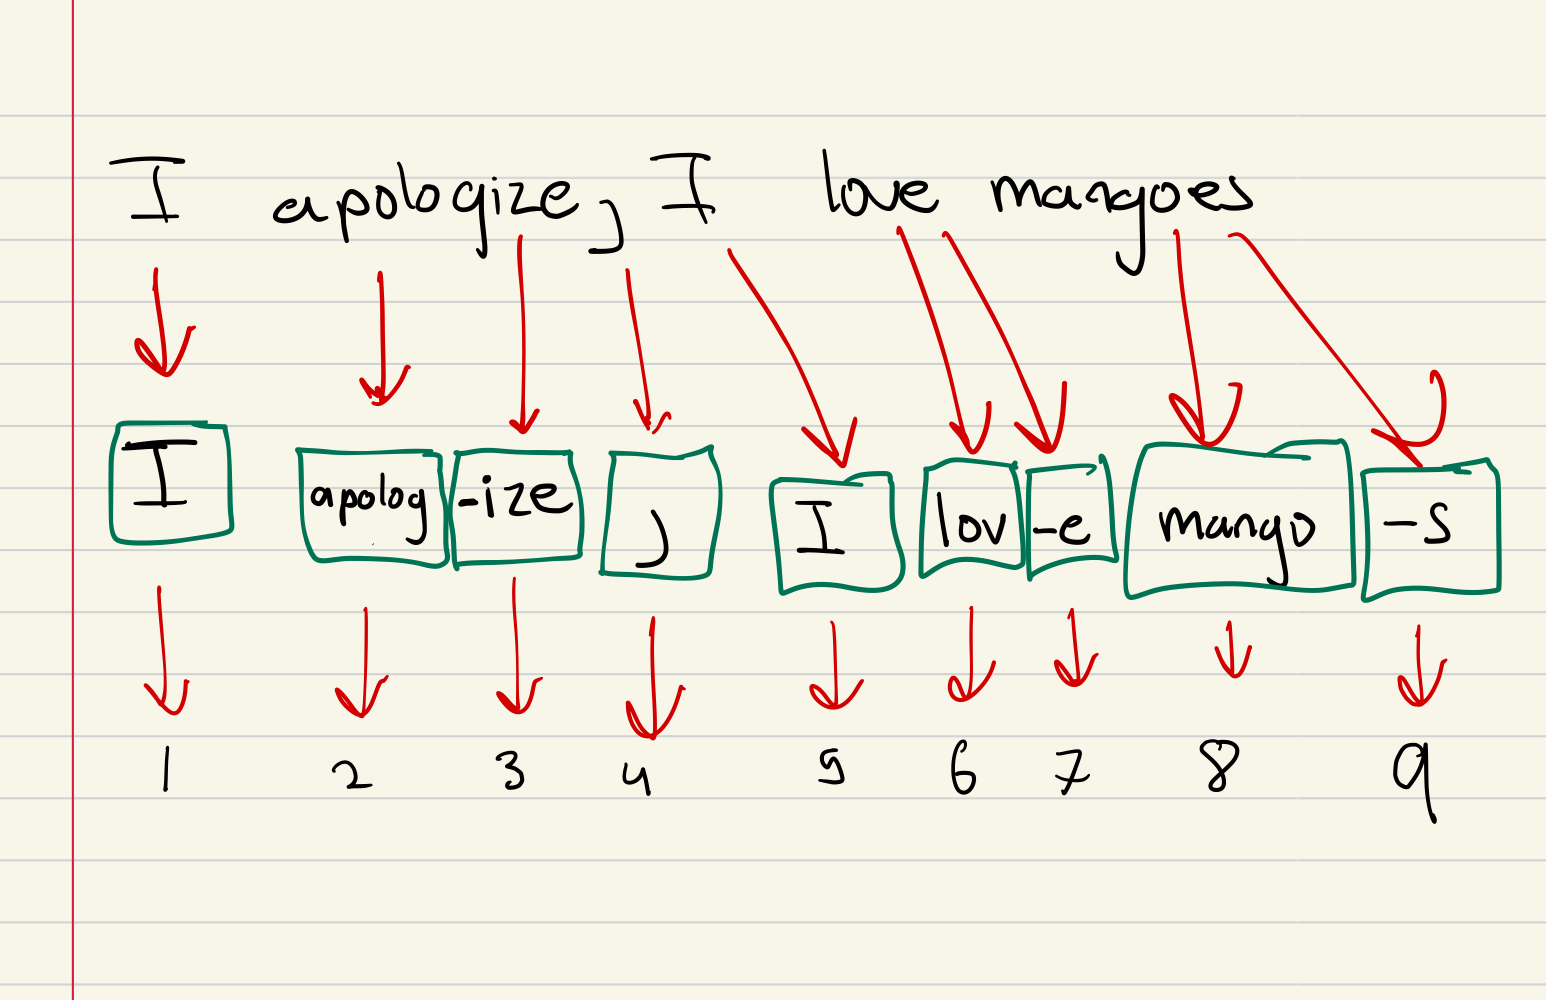

#  Two Problems
1. Text is way to large to feed into LLM and get a response
2. We saw that the words were represented by ids. But is that the best way to represent these words?

To fix the first problem, what if we tried to chunk the text and make it shorter. Maybe we send it in pieces to the LLM?

### Text Splitters: The LangChain Way to split text

Several different splitters
- CharacterTextSplitter: Split when chunk reaches X # of characters
- RecursiveCharacterTextSplitter: Split when chunk reaches X # of characters, BUT make sure to split in the last "\n"

In [134]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200, separator="")
splits = text_splitter.split_documents(docs)

print("# of chunks:", len(splits), "\n")
print(splits[0].page_content)

# of chunks: 3880 

~ Ishaq on 8/24/23, 1:05:53 PM: did anyone take cs 1331 online w/ Omojokun, or is in it now? How is it?

~ Lemon Pepper Hoom on 8/24/23, 1:14:25 PM: @16784880988 took it fall 2021

~ Zain Ghazanfar on 8/24/23, 1:27:20 PM: Took it last semester with him. Exams are pretty easy as long as you watch the videos and actually do the hws (don’t copy off github 😭)

~ Mirza Zuhayr on 8/24/23, 1:28:15 PM: Free shirts in Smithgall building next to student center, only large tho

~ Abdullah Bazz on 8/24/23, 1:35:46 PM: does anyone know what bus goes from east campus to west ?

~ Abdullah Bazz on 8/24/23, 1:35:51 PM: i have class at howey

~ Zain Ghazanfar on 8/24/23, 1:36:43 PM: Downlod transloc

~ Zain Ghazanfar on 8/24/23, 1:36:48 PM: Itll tell u all of the routes

~ Nabhan on 8/24/23, 1:37:12 PM: download the bus app!

~ Abdullah Bazz on 8/24/23, 1:37:52 PM: bet thank y’all

~ Ishaq on 8/24/23, 1:55:51 PM: ahhh ok, thank you!!

~ Abdurrahman Abdulmalik on 8/24/23, 2:24:06 PM:

In [137]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Chunk Size is the limit for the number of characters / chunk
# Chunk overlap is how many characters from the previous chunk included in the current chunk. Used so that context, thoughts are not broken from chunk to chunk.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

print("# of chunks:", len(splits), "\n")
print(splits[0].page_content)

# of chunks: 3889 

~ Ishaq on 8/24/23, 1:05:53 PM: did anyone take cs 1331 online w/ Omojokun, or is in it now? How is it?

~ Lemon Pepper Hoom on 8/24/23, 1:14:25 PM: @16784880988 took it fall 2021

~ Zain Ghazanfar on 8/24/23, 1:27:20 PM: Took it last semester with him. Exams are pretty easy as long as you watch the videos and actually do the hws (don’t copy off github 😭)

~ Mirza Zuhayr on 8/24/23, 1:28:15 PM: Free shirts in Smithgall building next to student center, only large tho

~ Abdullah Bazz on 8/24/23, 1:35:46 PM: does anyone know what bus goes from east campus to west ?

~ Abdullah Bazz on 8/24/23, 1:35:51 PM: i have class at howey

~ Zain Ghazanfar on 8/24/23, 1:36:43 PM: Downlod transloc

~ Zain Ghazanfar on 8/24/23, 1:36:48 PM: Itll tell u all of the routes

~ Nabhan on 8/24/23, 1:37:12 PM: download the bus app!

~ Abdullah Bazz on 8/24/23, 1:37:52 PM: bet thank y’all

~ Ishaq on 8/24/23, 1:55:51 PM: ahhh ok, thank you!!


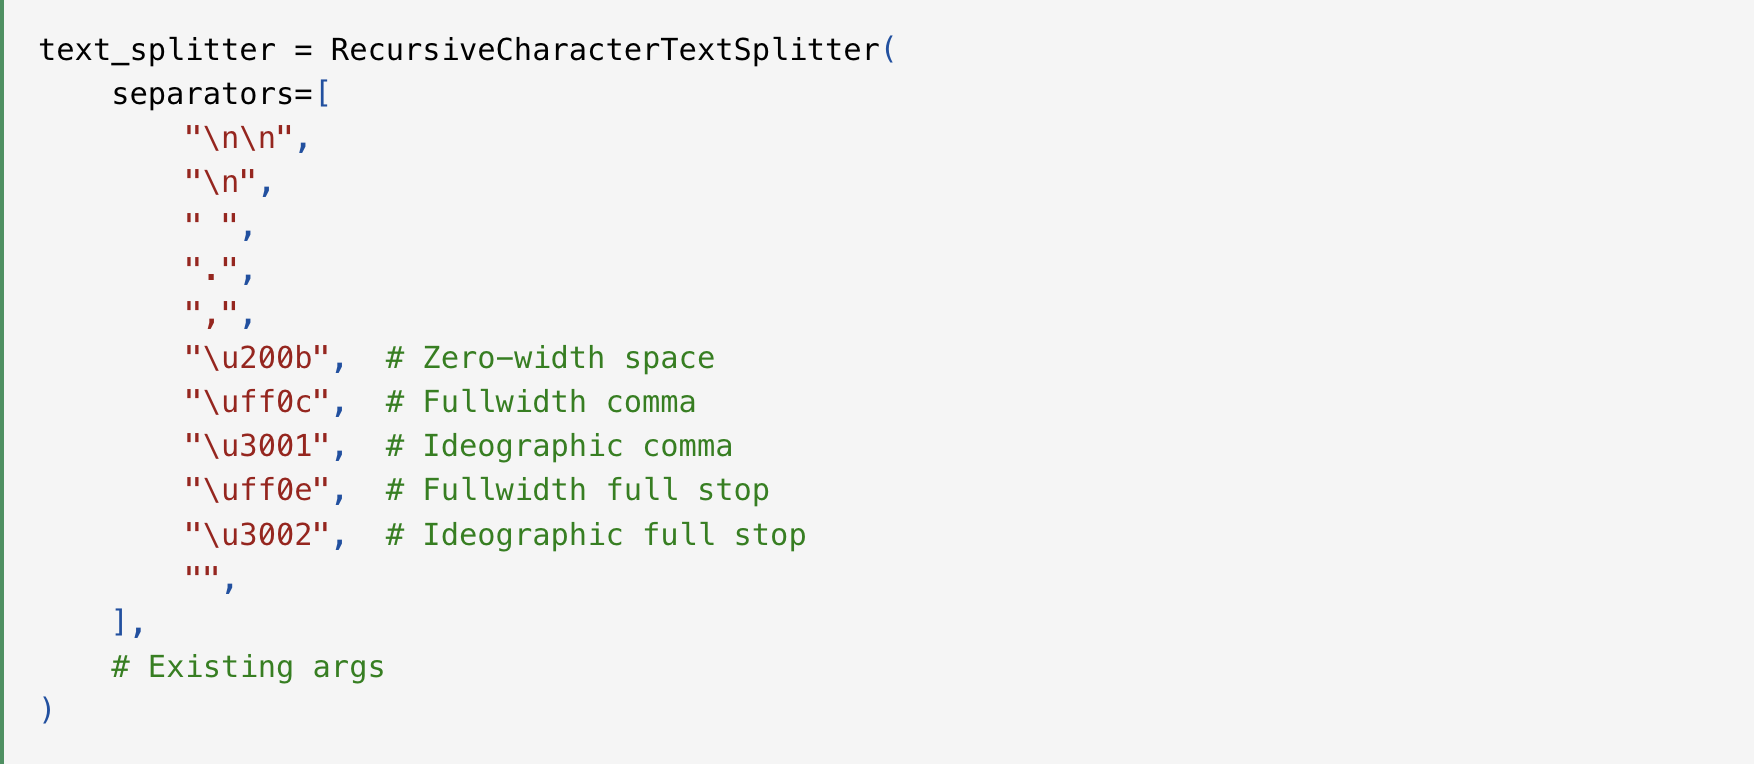

#### Now we have 3889 chunks!
But there is still a big problem. Given a query, like ```What's tawhids favourite topic to talk about in the MSA chat```, how are we going to best CHOOSE one of these 3889 chunks? 


It would be super cool to somehow find similar chunks based on the question right? How can we find these similar chunks?

# Vector Embeddings and Vector Databases!
What if we represented each token id as a vector? 

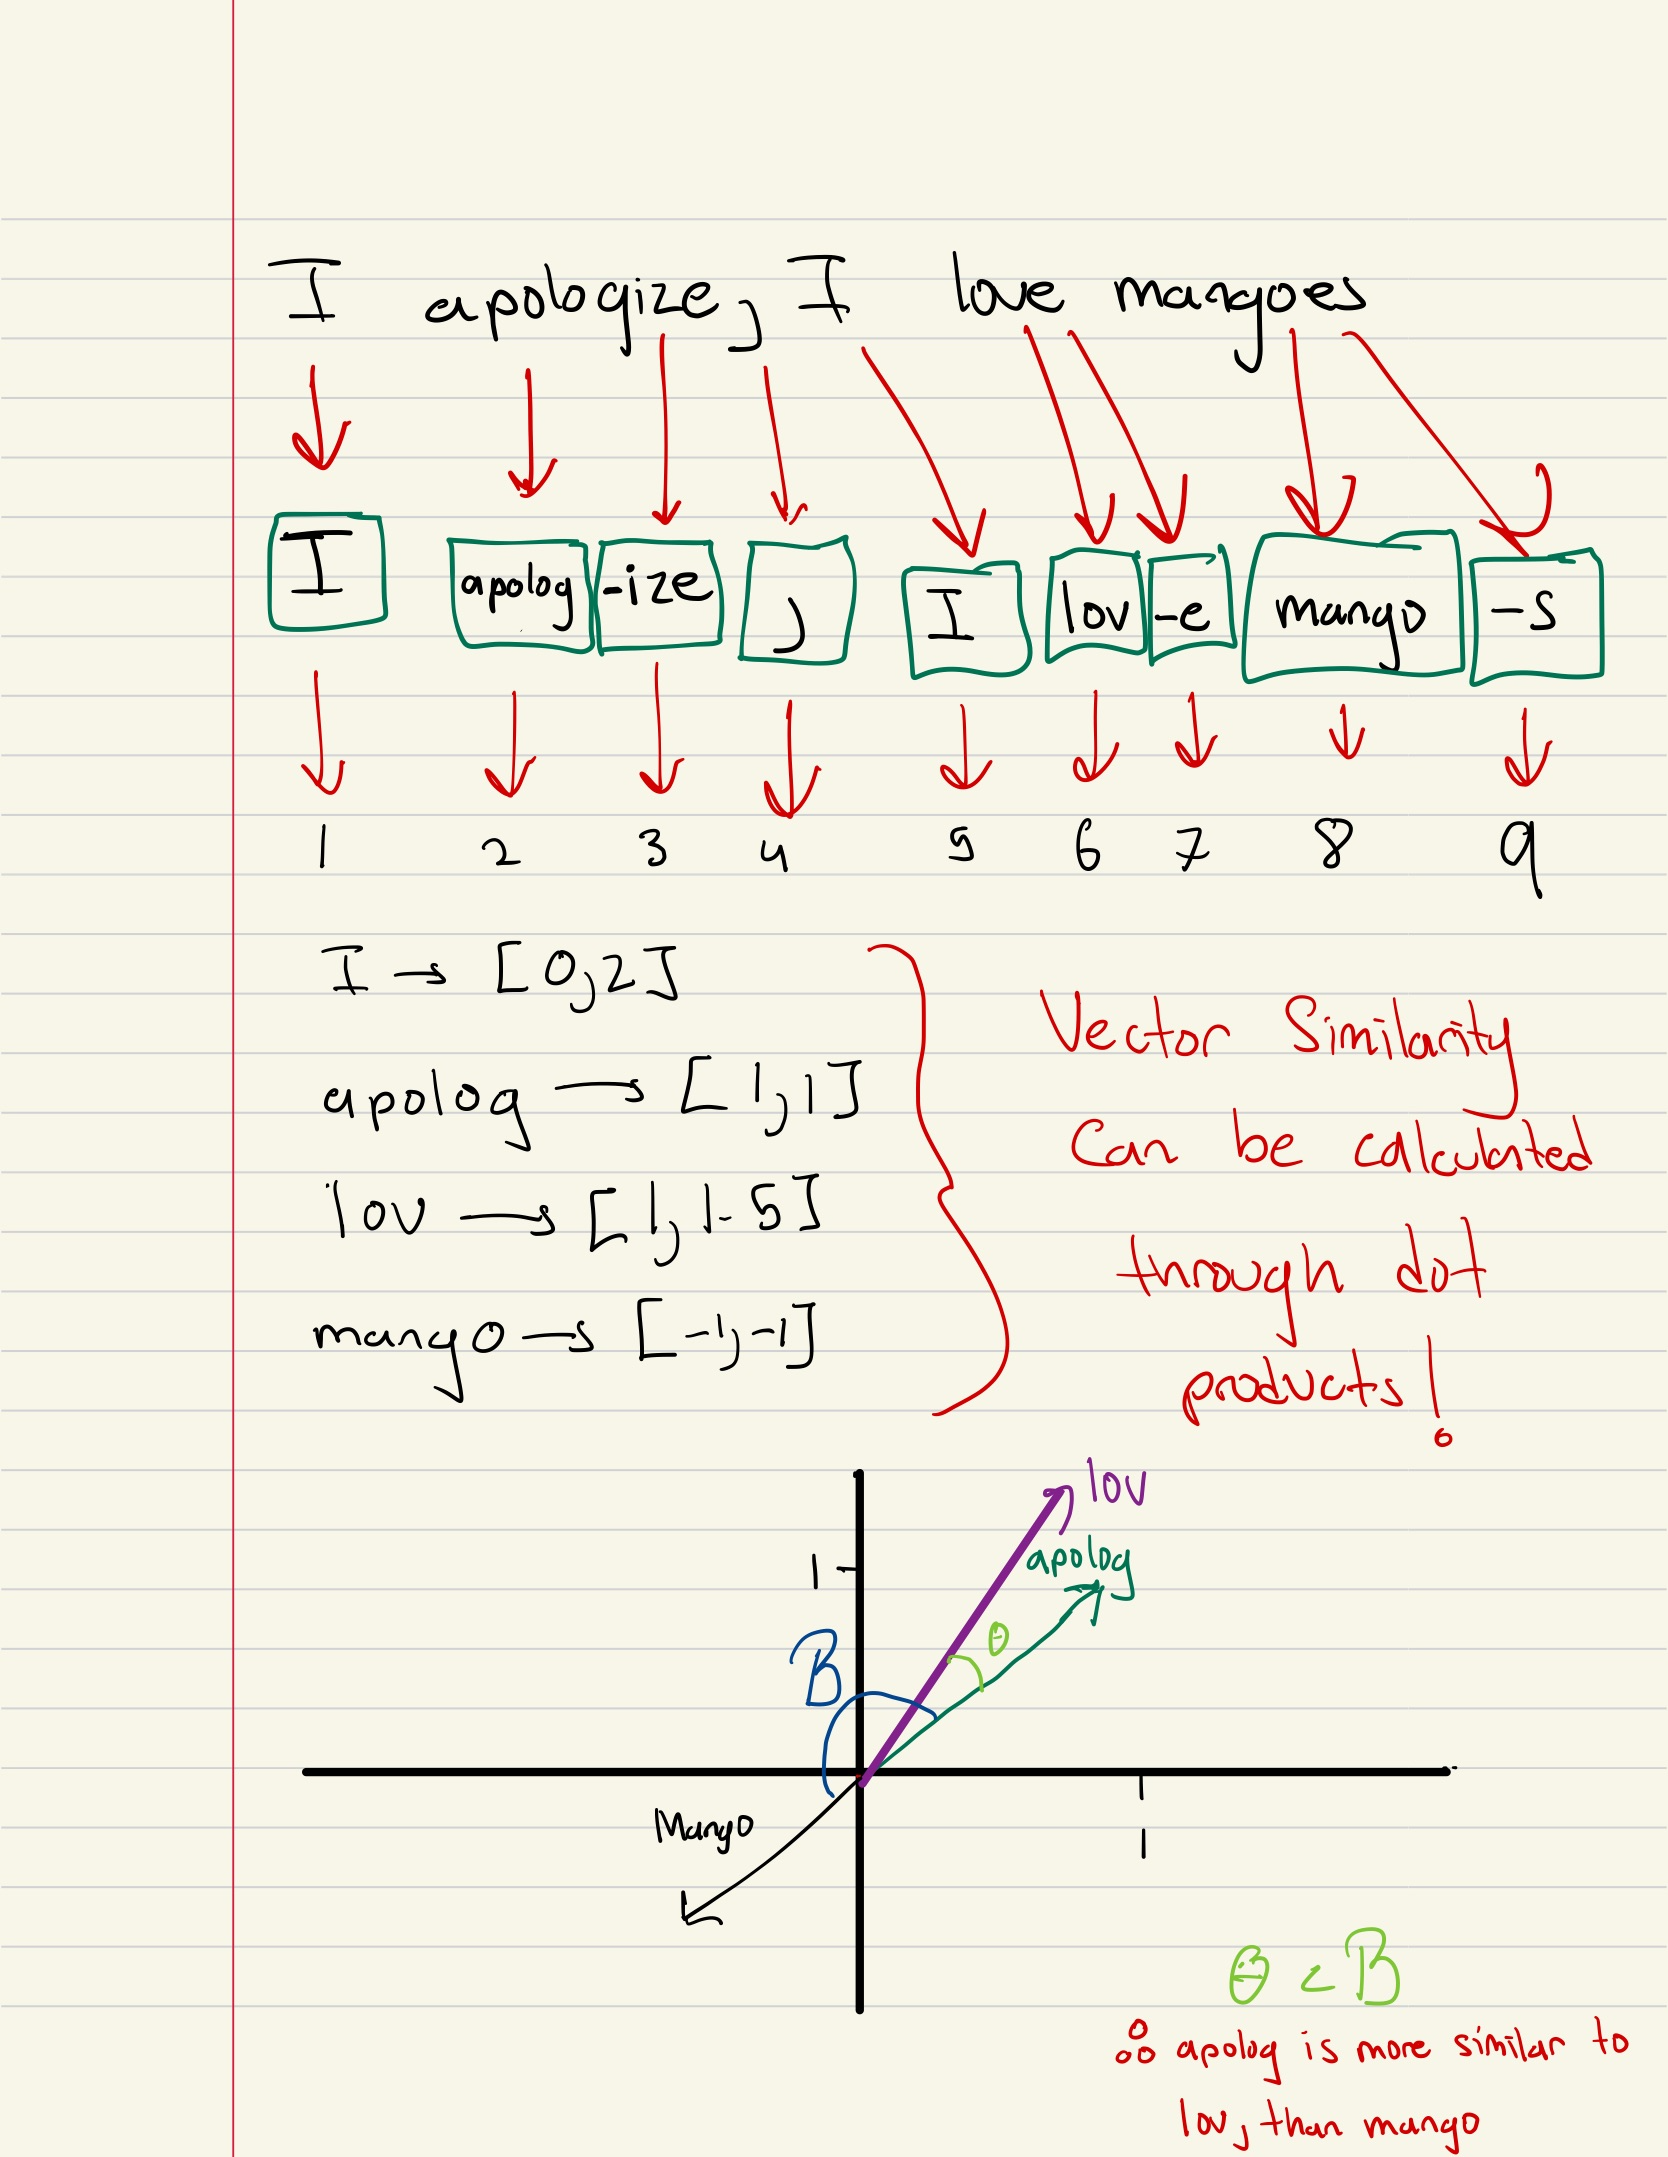

In [176]:
from langchain_openai import OpenAIEmbeddings


embeddings = OpenAIEmbeddings() # these embedding models have the correct vector representation for each token so that similar words in english are actually similar

hate_embedding = embeddings.embed_query("super sad")
lov_embedding = embeddings.embed_query("happy")
apolog_embedding = embeddings.embed_query("apology")

KeyboardInterrupt: 

#### Calculate Cosine Similarity

In [185]:
from langchain_openai import OpenAIEmbeddings
import numpy as np

# Initialize embeddings
embeddings = OpenAIEmbeddings()

# Use strong contextual phrases for stark contrasts
love_embedding = np.array(embeddings.embed_query("Love"))
hate_embedding = np.array(embeddings.embed_query("Hate"))
apologize_embedding = np.array(embeddings.embed_query("Apologize"))

# Cosine similarity function
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Calculate cosine similarities
similarity_love_hate = cosine_similarity(love_embedding, hate_embedding)
similarity_love_apologize = cosine_similarity(love_embedding, apologize_embedding)

# Print results
print(f"Cosine similarity (Love vs Hate): {similarity_love_hate:.4f}")
print(f"Cosine similarity (Love vs Apologize): {similarity_love_apologize:.4f}")


Cosine similarity (Love vs Hate): 0.8441
Cosine similarity (Love vs Apologize): 0.7813


## Detailed walkthrough

Let’s go through the above code step-by-step to really understand what’s
going on.

## 1. Indexing: Load {#indexing-load}

We need to first load the blog post contents. We can use
[DocumentLoaders](/docs/concepts/document_loaders)
for this, which are objects that load in data from a source and return a
list of
[Documents](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.base.Document.html).
A `Document` is an object with some `page_content` (str) and `metadata`
(dict).

In this case we’ll use the
[WebBaseLoader](/docs/integrations/document_loaders/web_base),
which uses `urllib` to load HTML from web URLs and `BeautifulSoup` to
parse it to text. We can customize the HTML -\> text parsing by passing
in parameters into the `BeautifulSoup` parser via `bs_kwargs` (see
[BeautifulSoup
docs](https://beautiful-soup-4.readthedocs.io/en/latest/#beautifulsoup)).
In this case only HTML tags with class “post-content”, “post-title”, or
“post-header” are relevant, so we’ll remove all others.

In [7]:
import bs4
# Only keep post title, headers, and content from the full HTML.
whatsapp_loader = WhatsAppChatLoader(path="./chat_formatted.txt")
docs = whatsapp_loader.load()

len(docs[0].page_content)

3104033

In [8]:
print(docs[0].page_content[-500:])

r his journey ahead

~ Abdullah on 11/20/24, 12:35:07 PM: Xan yall add a tayammun station in wudhu room

~ Mirza Zuhayr on 11/20/24, 12:44:19 PM: Whats that

~ Omar Jaafar on 11/20/24, 12:44:50 PM: Tayammum is the wudu u can make without water

~ Omar Jaafar on 11/20/24, 12:44:55 PM: Stones and dirt and stuff

~ Yaseen on 11/20/24, 12:51:14 PM: 😂😂😂

~ Mirbaan on 11/20/24, 1:07:00 PM: Yoooooooooo🤣

~ Abdullah Kobir on 11/20/24, 1:11:09 PM: @14705337986 got done dirty in the new MSA post I’m sry




### Go deeper

`DocumentLoader`: Object that loads data from a source as list of
`Documents`.

- [Docs](/docs/how_to#document-loaders):
  Detailed documentation on how to use `DocumentLoaders`.
- [Integrations](/docs/integrations/document_loaders/): 160+
  integrations to choose from.
- [Interface](https://python.langchain.com/api_reference/core/document_loaders/langchain_core.document_loaders.base.BaseLoader.html):
  API reference for the base interface.


## 2. Indexing: Split {#indexing-split}


Our loaded document is over 42k characters which is too long to fit
into the context window of many models. Even for those models that could
fit the full post in their context window, models can struggle to find
information in very long inputs.

To handle this we’ll split the `Document` into chunks for embedding and
vector storage. This should help us retrieve only the most relevant parts
of the blog post at run time.

In this case we’ll split our documents into chunks of 1000 characters
with 200 characters of overlap between chunks. The overlap helps
mitigate the possibility of separating a statement from important
context related to it. We use the
[RecursiveCharacterTextSplitter](/docs/how_to/recursive_text_splitter),
which will recursively split the document using common separators like
new lines until each chunk is the appropriate size. This is the
recommended text splitter for generic text use cases.

We set `add_start_index=True` so that the character index where each
split Document starts within the initial Document is preserved as
metadata attribute “start_index”.

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

3889

In [10]:
len(all_splits[5].page_content)

985

### Go deeper

`TextSplitter`: Object that splits a list of `Document`s into smaller
chunks. Subclass of `DocumentTransformer`s.

- Learn more about splitting text using different methods by reading the [how-to docs](/docs/how_to#text-splitters)
- [Code (py or js)](/docs/integrations/document_loaders/source_code)
- [Scientific papers](/docs/integrations/document_loaders/grobid)
- [Interface](https://python.langchain.com/api_reference/text_splitters/base/langchain_text_splitters.base.TextSplitter.html): API reference for the base interface.

`DocumentTransformer`: Object that performs a transformation on a list
of `Document` objects.

- [Docs](/docs/how_to#text-splitters): Detailed documentation on how to use `DocumentTransformers`
- [Integrations](/docs/integrations/document_transformers/)
- [Interface](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.transformers.BaseDocumentTransformer.html): API reference for the base interface.

## 3. Indexing: Store {#indexing-store}

Now we need to index our 66 text chunks so that we can search over them
at runtime. The most common way to do this is to embed the contents of
each document split and insert these embeddings into a vector database
(or vector store). When we want to search over our splits, we take a
text search query, embed it, and perform some sort of “similarity”
search to identify the stored splits with the most similar embeddings to
our query embedding. The simplest similarity measure is cosine
similarity — we measure the cosine of the angle between each pair of
embeddings (which are high dimensional vectors).

We can embed and store all of our document splits in a single command
using the [Chroma](/docs/integrations/vectorstores/chroma)
vector store and
[OpenAIEmbeddings](/docs/integrations/text_embedding/openai)
model.


In [13]:
embeddings = OpenAIEmbeddings()
embedded_queries = embeddings.embed_documents([document.page_content for document in all_splits])

In [16]:
import torch
torch.tensor(embedded_queries).shape

torch.Size([3889, 1536])

In [19]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
vectorstore = Chroma.from_documents(documents=all_splits, embedding=OpenAIEmbeddings())

### Go deeper

`Embeddings`: Wrapper around a text embedding model, used for converting
text to embeddings.

- [Docs](/docs/how_to/embed_text): Detailed documentation on how to use embeddings.
- [Integrations](/docs/integrations/text_embedding/): 30+ integrations to choose from.
- [Interface](https://python.langchain.com/api_reference/core/embeddings/langchain_core.embeddings.Embeddings.html): API reference for the base interface.

`VectorStore`: Wrapper around a vector database, used for storing and
querying embeddings.

- [Docs](/docs/how_to/vectorstores): Detailed documentation on how to use vector stores.
- [Integrations](/docs/integrations/vectorstores/): 40+ integrations to choose from.
- [Interface](https://python.langchain.com/api_reference/core/vectorstores/langchain_core.vectorstores.base.VectorStore.html): API reference for the base interface.

This completes the **Indexing** portion of the pipeline. At this point
we have a query-able vector store containing the chunked contents of our
blog post. Given a user question, we should ideally be able to return
the snippets of the blog post that answer the question.

## 4. Retrieval and Generation: Retrieve {#retrieval-and-generation-retrieve}

Now let’s write the actual application logic. We want to create a simple
application that takes a user question, searches for documents relevant
to that question, passes the retrieved documents and initial question to
a model, and returns an answer.

First we need to define our logic for searching over documents.
LangChain defines a
[Retriever](/docs/concepts/retrievers) interface
which wraps an index that can return relevant `Documents` given a string
query.

The most common type of `Retriever` is the
[VectorStoreRetriever](/docs/how_to/vectorstore_retriever),
which uses the similarity search capabilities of a vector store to
facilitate retrieval. Any `VectorStore` can easily be turned into a
`Retriever` with `VectorStore.as_retriever()`:

In [53]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 5})
retrieved_docs = retriever.invoke("what was the msa monthly about")
len(retrieved_docs)

5

### Go deeper

Vector stores are commonly used for retrieval, but there are other ways
to do retrieval, too.

`Retriever`: An object that returns `Document`s given a text query

- [Docs](/docs/how_to#retrievers): Further
  documentation on the interface and built-in retrieval techniques.
  Some of which include:
  - `MultiQueryRetriever` [generates variants of the input
    question](/docs/how_to/MultiQueryRetriever)
    to improve retrieval hit rate.
  - `MultiVectorRetriever` instead generates
    [variants of the
    embeddings](/docs/how_to/multi_vector),
    also in order to improve retrieval hit rate.
  - `Maximal marginal relevance` selects for [relevance and
    diversity](https://www.cs.cmu.edu/~jgc/publication/The_Use_MMR_Diversity_Based_LTMIR_1998.pdf)
    among the retrieved documents to avoid passing in duplicate
    context.
  - Documents can be filtered during vector store retrieval using
    metadata filters, such as with a [Self Query
    Retriever](/docs/how_to/self_query).
- [Integrations](/docs/integrations/retrievers/): Integrations
  with retrieval services.
- [Interface](https://python.langchain.com/api_reference/core/retrievers/langchain_core.retrievers.BaseRetriever.html):
  API reference for the base interface.

## 5. Retrieval and Generation: Generate {#retrieval-and-generation-generate}

Let’s put it all together into a chain that takes a question, retrieves
relevant documents, constructs a prompt, passes it into a model, and
parses the output.

We’ll use the gpt-4o-mini OpenAI chat model, but any LangChain `LLM`
or `ChatModel` could be substituted in.

<ChatModelTabs
  customVarName="llm"
  anthropicParams={`model="claude-3-sonnet-20240229", temperature=0.2, max_tokens=1024`}
/>

We’ll use a prompt for RAG that is checked into the LangChain prompt hub
([here](https://smith.langchain.com/hub/rlm/rag-prompt)).

In [54]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "filler context", "question": "filler question"}
).to_messages()

example_messages

[HumanMessage(content="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: filler question \nContext: filler context \nAnswer:", additional_kwargs={}, response_metadata={})]

In [55]:
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: filler question 
Context: filler context 
Answer:


We’ll use the [LCEL Runnable](/docs/concepts/lcel)
protocol to define the chain, allowing us to 

- pipe together components and functions in a transparent way 
- automatically trace our chain in LangSmith 
- get streaming, async, and batched calling out of the box.

Here is the implementation:

In [58]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

for chunk in rag_chain.stream("What was some of the funniest things said in the chat"):
    print(chunk, end="", flush=True)

The funniest things said in the chat based on the context are: Mirza Zuhayr jokingly calling GSU a "bum city" and saying everyone goes to GT, Sunan telling someone to "accept the glaze", Yusuf Quadri claiming he can bench Sunan, and Omar Jaafar's sarcastic advice on "20 year old dudes who are still in bed at 11am".

Let's dissect the LCEL to understand what's going on.

First: each of these components (`retriever`, `prompt`, `llm`, etc.) are instances of [Runnable](/docs/concepts/lcel). This means that they implement the same methods-- such as sync and async `.invoke`, `.stream`, or `.batch`-- which makes them easier to connect together. They can be connected into a [RunnableSequence](https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.base.RunnableSequence.html)-- another Runnable-- via the `|` operator.

LangChain will automatically cast certain objects to runnables when met with the `|` operator. Here, `format_docs` is cast to a [RunnableLambda](https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.base.RunnableLambda.html), and the dict with `"context"` and `"question"` is cast to a [RunnableParallel](https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.base.RunnableParallel.html). The details are less important than the bigger point, which is that each object in the chain is a Runnable.

Let's trace how the input question flows through the above runnables.

As we've seen above, the input to `prompt` is expected to be a dict with keys `"context"` and `"question"`. So the first element of this chain builds runnables that will calculate both of these from the input question:
- `retriever | format_docs` passes the question through the retriever, generating [Document](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.base.Document.html) objects, and then to `format_docs` to generate strings;
- `RunnablePassthrough()` passes through the input question unchanged.

That is, if you constructed
```python
chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
)
```
Then `chain.invoke(question)` would build a formatted prompt, ready for inference. (Note: when developing with LCEL, it can be practical to test with sub-chains like this.)

The last steps of the chain are `llm`, which runs the inference, and `StrOutputParser()`, which just plucks the string content out of the LLM's output message.

You can analyze the individual steps of this chain via its [LangSmith
trace](https://smith.langchain.com/public/1799e8db-8a6d-4eb2-84d5-46e8d7d5a99b/r).

### Built-in chains

If preferred, LangChain includes convenient functions that implement the above LCEL. We compose two functions:

- [create_stuff_documents_chain](https://python.langchain.com/api_reference/langchain/chains/langchain.chains.combine_documents.stuff.create_stuff_documents_chain.html) specifies how retrieved context is fed into a prompt and LLM. In this case, we will "stuff" the contents into the prompt -- i.e., we will include all retrieved context without any summarization or other processing. It largely implements our above `rag_chain`, with input keys `context` and `input`-- it generates an answer using retrieved context and query.
- [create_retrieval_chain](https://python.langchain.com/api_reference/langchain/chains/langchain.chains.retrieval.create_retrieval_chain.html) adds the retrieval step and propagates the retrieved context through the chain, providing it alongside the final answer. It has input key `input`, and includes `input`, `context`, and `answer` in its output.

#### Returning sources
Often in Q&A applications it's important to show users the sources that were used to generate the answer. LangChain's built-in `create_retrieval_chain` will propagate retrieved source documents to the output under the `"context"` key: